In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Importing Needed Libraries

<div dir="rtl"> ابتدا کتابخانه هایی که به آن ها نیاز داریم را وارد می کنیم .

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

<div dir="rtl"> برای ساختن شبکه ی عصبی از کتابخانه ی tensorflow استفاده شده است .

In [22]:
import tensorflow as tf

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv3D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Model, Sequential

# Loading Data

<div dir="rtl"> قبل از هرکاری داده ها را وارد میکینم ، برای اینکه حجم کمی از رم اشغال شود با این دستور داده ها به صورت BatchDataSet وارد میشوند .

In [5]:
train_set = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/Training',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

test_set = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/Testing',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [6]:
for image, label in train_set:
  image = image / 255

for image, label in test_set:
  image = image / 255

<div dir="rtl"> در زیر از هر کلاس سرطان یک تصویر به عنوان نمونه نشان داده شده است .

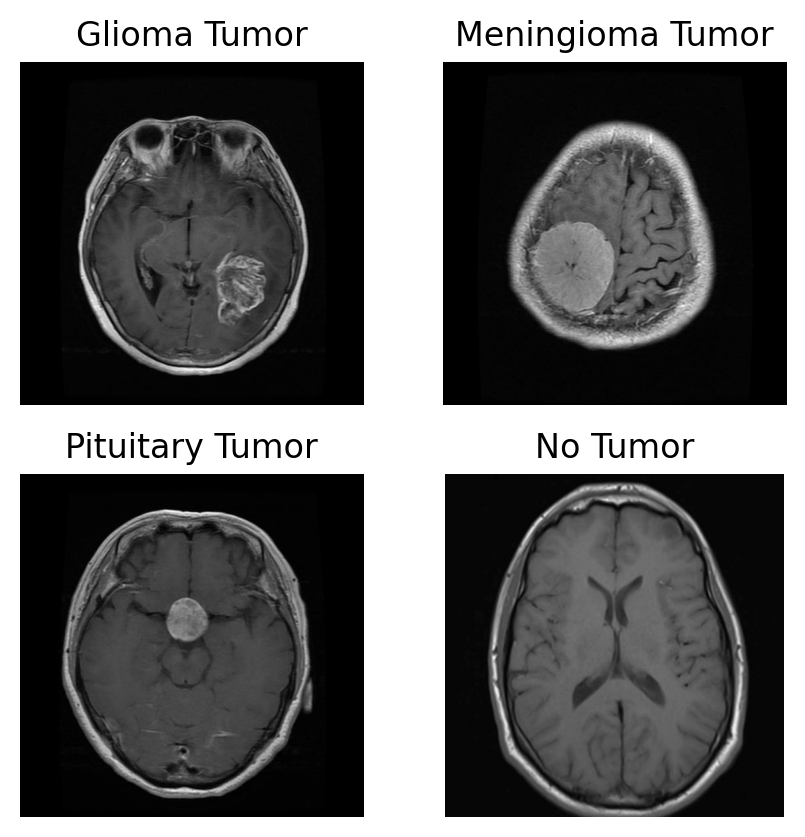

In [7]:
glioma_tumor_img = cv2.imread('/gdrive/MyDrive/gg (8).jpg')
meningioma_tumor_img = cv2.imread('/gdrive/MyDrive/m (197).jpg')
no_tumor_img = cv2.imread('/gdrive/MyDrive/3.jpg')
pituitary_tumor_img = cv2.imread('/gdrive/MyDrive/p (21).jpg')

plt.figure(figsize=(5, 5), dpi=200)
plt.subplot(2, 2, 1)
plt.title('Glioma Tumor')
plt.imshow(glioma_tumor_img[:,:,::-1])
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title('Meningioma Tumor')
plt.imshow(meningioma_tumor_img[:,:,::-1])
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title('Pituitary Tumor')
plt.imshow(pituitary_tumor_img[:,:,::-1])
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title('No Tumor')
plt.imshow(no_tumor_img[:,:,::-1])
plt.axis("off")

plt.show()

# Models


<div dir="rtl"> در این قسمت چند شبکه ی عصبی طراحی شده است .


## First Model

In [45]:
Model_1 = Sequential()
Model_1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 512, 1)))
Model_1.add(Conv2D(64, (3, 3), activation = 'relu')) 
Model_1.add(MaxPool2D(2, 2))
Model_1.add(Dropout(0.3))

Model_1.add(Conv2D(64, (3, 3), activation = 'relu'))
Model_1.add(Conv2D(64, (3, 3), activation = 'relu')) 
Model_1.add(Dropout(0.3))
Model_1.add(MaxPool2D(2, 2))
Model_1.add(Dropout(0.3))

Model_1.add(Conv2D(32, (3, 3), activation = 'relu'))
Model_1.add(Conv2D(32, (3, 3), activation = 'relu'))
Model_1.add(Conv2D(64, (3, 3), activation = 'relu'))
Model_1.add(MaxPool2D(2, 2))
Model_1.add(Dropout(0.3))

Model_1.add(Flatten())

Model_1.add(Dense(50, activation = 'relu'))
Model_1.add(Dense(20, activation = 'relu'))
Model_1.add(Dropout(0.3))

Model_1.add(Dense(4, activation = 'softmax'))

<div dir="rtl"> شکل شبکه ی ساخته شده در زیر رسم شده است .

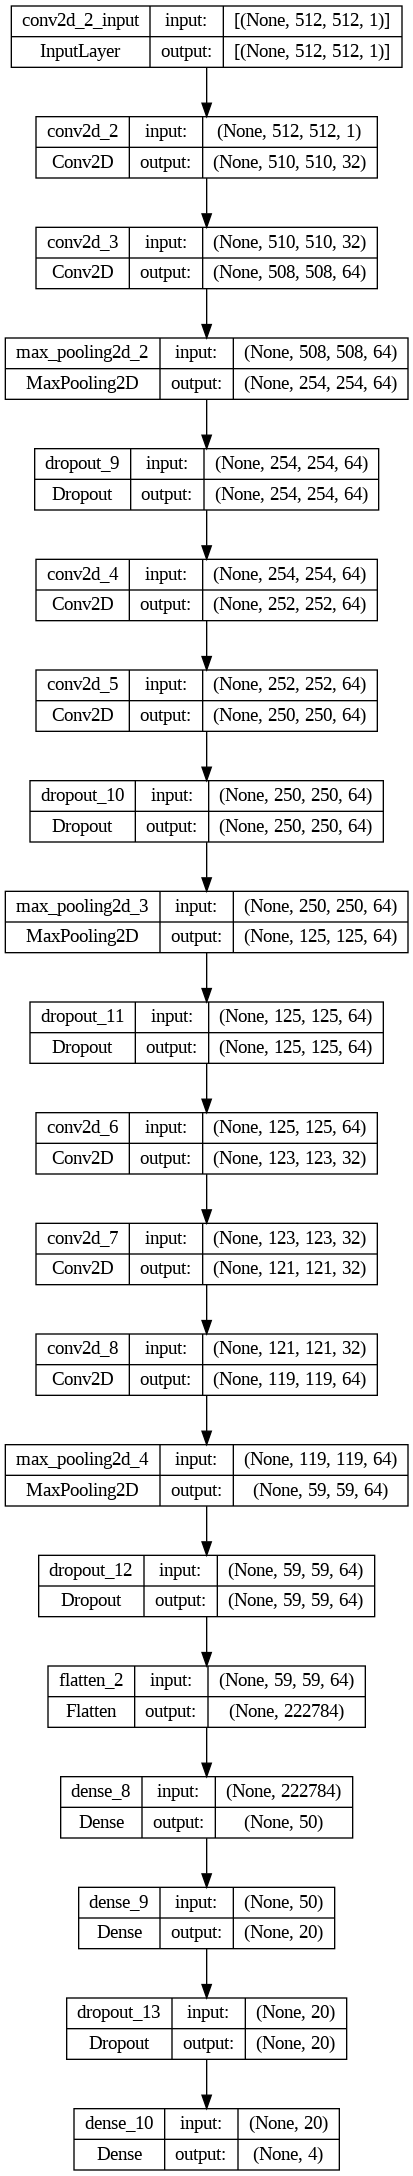

In [46]:
tf.keras.utils.plot_model(Model_1,
                          show_shapes = True,
                          expand_nested = True)

<div dir="rtl"> در ادامه داده های موجود که به صورت تصویر هستند بر مدل فیت شده است .

In [47]:
Model_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [48]:
hist_1 = Model_1.fit(train_set, epochs = 20, validation_data = test_set)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


90/90 [==============================] - 100s 948ms/step - loss: 5.3450 - accuracy: 0.4017 - val_loss: 1.4101 - val_accuracy: 0.2462
Epoch 2/20
90/90 [==============================] - 78s 860ms/step - loss: 1.1246 - accuracy: 0.5206 - val_loss: 1.4423 - val_accuracy: 0.2234
Epoch 3/20
90/90 [==============================] - 78s 860ms/step - loss: 0.9615 - accuracy: 0.5652 - val_loss: 1.4180 - val_accuracy: 0.3122
Epoch 4/20
90/90 [==============================] - 78s 860ms/step - loss: 0.8914 - accuracy: 0.6122 - val_loss: 1.4629 - val_accuracy: 0.2919
Epoch 5/20
90/90 [==============================] - 78s 860ms/step - loss: 0.7870 - accuracy: 0.6519 - val_loss: 1.4144 - val_accuracy: 0.3528
Epoch 6/20
90/90 [==============================] - 78s 860ms/step - loss: 0.7237 - accuracy: 0.6774 - val_loss: 1.3243 - val_accuracy: 0.4010
Epoch 7/20
90/90 [==============================] - 78s 861ms/step - loss: 0.6831 - accuracy: 0.7042 - val_loss: 1.3454 - val_accuracy: 0.4137
Epoch 8/2

<div dir="rtl"> در ادامه نتایج مدل آمده است . 

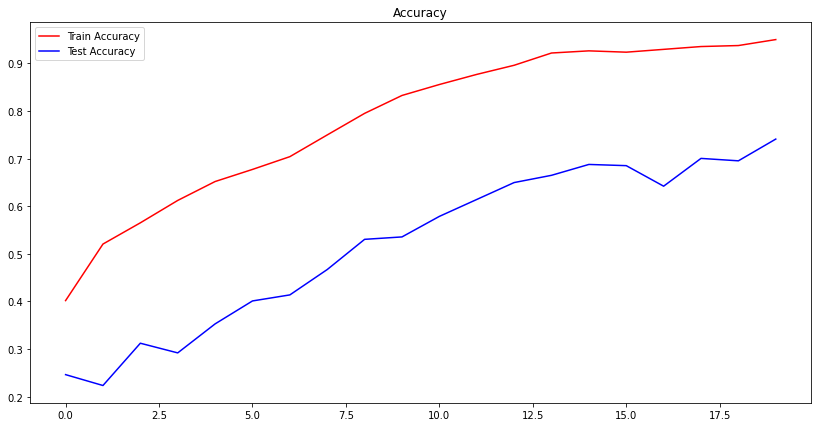

In [49]:
acc_1 = hist_1.history['accuracy']
val_acc_1 = hist_1.history['val_accuracy']

epochs = range(len(acc_1))
plt.figure(figsize = (14, 7))
plt.title('Accuracy')
plt.plot(epochs, acc_1, 'r', label = 'Train Accuracy')
plt.plot(epochs, val_acc_1, 'b', label = 'Test Accuracy')
plt.legend(loc = 'upper left')

plt.show()

<div dir="rtl"> نتیجه ی evaluate شده از مدل در زیر آمده است .

In [50]:
Model_1.evaluate(test_set)

13/13 [==============================] - 5s 282ms/step - loss: 1.6294 - accuracy: 0.7411


[1.629400610923767, 0.7411167621612549]

## Second Model

In [51]:
Model_2 = Sequential()
Model_2.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (512, 512, 1)))
Model_2.add(Conv2D(64, (3, 3), activation = 'relu')) 
Model_2.add(MaxPool2D(2, 2))
Model_2.add(Dropout(0.3))

Model_2.add(Conv2D(32, (3, 3), activation = 'relu'))
Model_2.add(Conv2D(32, (3, 3), activation = 'relu')) 
Model_2.add(Dropout(0.3))
Model_2.add(MaxPool2D(2, 2))
Model_2.add(Dropout(0.3))

Model_2.add(Conv2D(32, (3, 3), activation = 'relu'))
Model_2.add(Conv2D(32, (3, 3), activation = 'relu'))
Model_2.add(Conv2D(64, (3, 3), activation = 'relu'))
Model_2.add(MaxPool2D(2, 2))
Model_2.add(Dropout(0.3))

Model_2.add(Flatten())

Model_2.add(Dense(60, activation = 'relu'))
Model_2.add(Dense(30, activation = 'relu'))
Model_2.add(Dropout(0.3))

Model_2.add(Dense(4, activation = 'softmax'))

<div dir="rtl"> شکل شبکه ی ساخته شده در زیر رسم شده است .

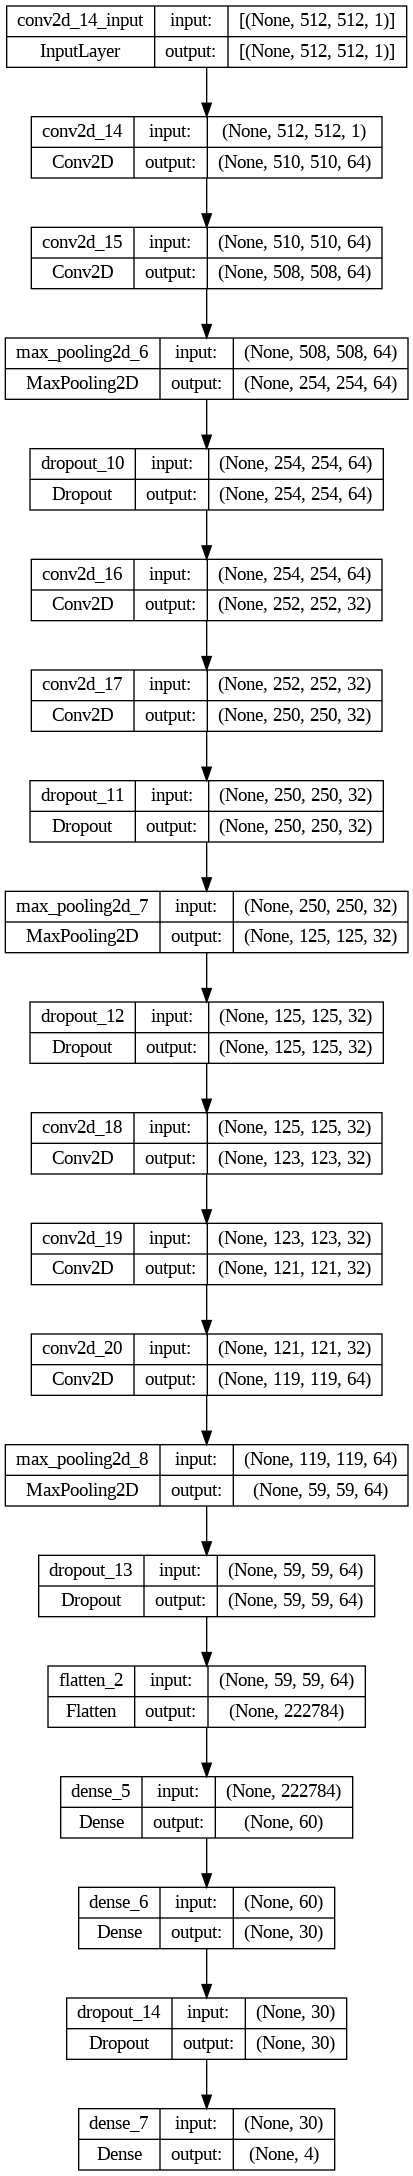

In [ ]:
tf.keras.utils.plot_model(Model_2,
                          show_shapes = True,
                          expand_nested = True)

<div dir="rtl"> در ادامه داده های موجود که به صورت تصویر هستند بر مدل فیت شده است .

In [52]:
Model_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [53]:
hist_2 = Model_2.fit(train_set, epochs = 20, validation_data = test_set)

Epoch 1/20
90/90 [==============================] - 108s 1s/step - loss: 3.5139 - accuracy: 0.4286 - val_loss: 1.4002 - val_accuracy: 0.2563
Epoch 2/20
90/90 [==============================] - 85s 940ms/step - loss: 1.1054 - accuracy: 0.5003 - val_loss: 1.3746 - val_accuracy: 0.2970
Epoch 3/20
90/90 [==============================] - 85s 938ms/step - loss: 1.0266 - accuracy: 0.5111 - val_loss: 1.3703 - val_accuracy: 0.2690
Epoch 4/20
90/90 [==============================] - 85s 940ms/step - loss: 0.9209 - accuracy: 0.5718 - val_loss: 1.4355 - val_accuracy: 0.3909
Epoch 5/20
90/90 [==============================] - 85s 942ms/step - loss: 0.8209 - accuracy: 0.6251 - val_loss: 1.4478 - val_accuracy: 0.4289
Epoch 6/20
90/90 [==============================] - 85s 944ms/step - loss: 0.7102 - accuracy: 0.6836 - val_loss: 1.6784 - val_accuracy: 0.4543
Epoch 7/20
90/90 [==============================] - 85s 943ms/step - loss: 0.6248 - accuracy: 0.7296 - val_loss: 2.3695 - val_accuracy: 0.5178
E

<div dir="rtl"> در ادامه نتایج مدل آمده است . 

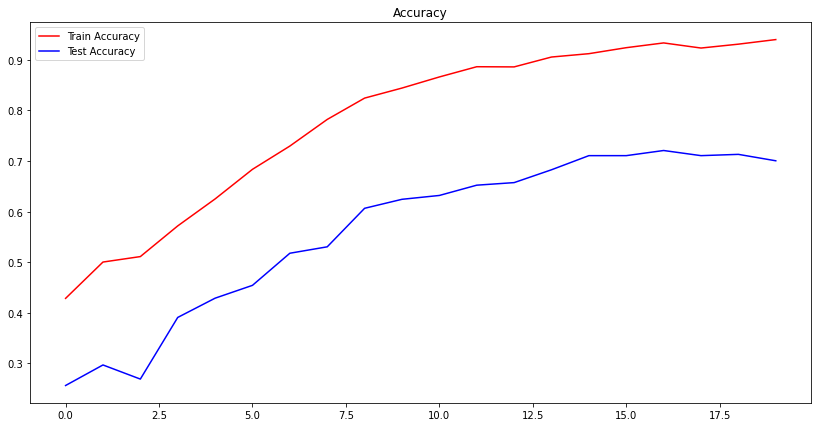

In [54]:
acc_2 = hist_2.history['accuracy']
val_acc_2 = hist_2.history['val_accuracy']

epochs = range(len(acc_2))
plt.figure(figsize = (14, 7))
plt.title('Accuracy')
plt.plot(epochs, acc_2, 'r', label = 'Train Accuracy')
plt.plot(epochs, val_acc_2, 'b', label = 'Test Accuracy')
plt.legend(loc = 'upper left')

plt.show()

<div dir="rtl"> نتیجه ی evaluate شده از مدل در زیر آمده است .

In [55]:
Model_2.evaluate(test_set)

13/13 [==============================] - 4s 286ms/step - loss: 2.8113 - accuracy: 0.7005


[2.811328172683716, 0.700507640838623]

## Third Model

In [56]:
Model_3 = Sequential()
Model_3.add(Conv2D(filters = 64, kernel_size = (5, 5), padding = 'same', activation = 'relu', input_shape = (512, 512, 1)))
Model_3.add(MaxPool2D(pool_size = (2, 2)))
Model_3.add(Dropout(0.25))

Model_3.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
Model_3.add(MaxPool2D(pool_size = (2, 2)))
Model_3.add(Dropout(0.25))

Model_3.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
Model_3.add(MaxPool2D(pool_size = (2, 2)))
Model_3.add(Dropout(0.25))

Model_3.add(Conv2D(filters = 256, kernel_size = (2, 2), padding = 'same', activation = 'relu'))
Model_3.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
Model_3.add(Dropout(0.3))

Model_3.add(Flatten())
Model_3.add(Dense(1024, activation = 'relu'))
Model_3.add(Dropout(0.5))
Model_3.add(Dense(4, activation = 'softmax'))

<div dir="rtl"> شکل شبکه ی ساخته شده در زیر رسم شده است .

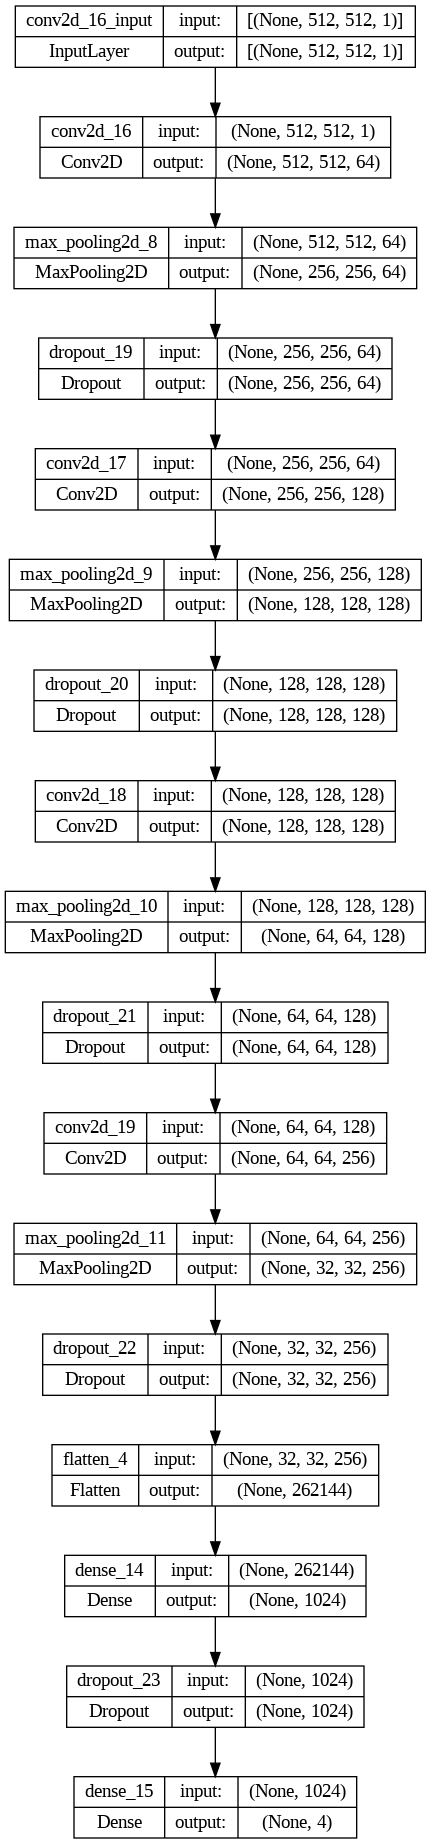

In [57]:
tf.keras.utils.plot_model(Model_3,
                          show_shapes = True,
                          expand_nested = True)

<div dir="rtl"> در ادامه داده های موجود که به صورت تصویر هستند بر مدل فیت شده است .

In [58]:
Model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [59]:
hist_3 = Model_3.fit(train_set, epochs = 20, validation_data = test_set)

Epoch 1/20
90/90 [==============================] - 70s 728ms/step - loss: 113.4940 - accuracy: 0.4666 - val_loss: 1.4254 - val_accuracy: 0.1701
Epoch 2/20
90/90 [==============================] - 62s 684ms/step - loss: 0.8520 - accuracy: 0.6446 - val_loss: 1.3956 - val_accuracy: 0.4162
Epoch 3/20
90/90 [==============================] - 62s 683ms/step - loss: 0.5682 - accuracy: 0.7840 - val_loss: 1.5244 - val_accuracy: 0.4518
Epoch 4/20
90/90 [==============================] - 62s 685ms/step - loss: 0.4304 - accuracy: 0.8387 - val_loss: 1.5785 - val_accuracy: 0.5228
Epoch 5/20
90/90 [==============================] - 62s 684ms/step - loss: 0.3428 - accuracy: 0.8805 - val_loss: 1.7513 - val_accuracy: 0.5406
Epoch 6/20
90/90 [==============================] - 62s 685ms/step - loss: 0.2848 - accuracy: 0.8993 - val_loss: 1.9186 - val_accuracy: 0.6574
Epoch 7/20
90/90 [==============================] - 62s 685ms/step - loss: 0.2395 - accuracy: 0.9164 - val_loss: 2.5350 - val_accuracy: 0.57

<div dir="rtl"> در ادامه نتایج مدل آمده است . 

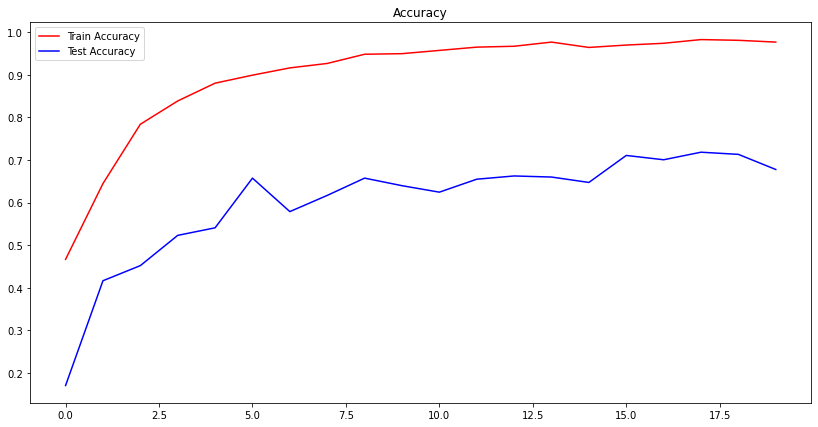

In [60]:
acc_3 = hist_3.history['accuracy']
val_acc_3 = hist_3.history['val_accuracy']

epochs = range(len(acc_3))
plt.figure(figsize = (14, 7))
plt.title('Accuracy')
plt.plot(epochs, acc_3, 'r', label = 'Train Accuracy')
plt.plot(epochs, val_acc_3, 'b', label = 'Test Accuracy')
plt.legend(loc = 'upper left')

plt.show()

<div dir="rtl"> نتیجه ی evaluate شده از مدل در زیر آمده است .

In [61]:
Model_3.evaluate(test_set)

13/13 [==============================] - 3s 206ms/step - loss: 2.6836 - accuracy: 0.6777


[2.683565139770508, 0.6776649951934814]

# Forth Model

<div dir="rtl">  در این مدل از مدل از قبل آماده شده ی EfficientNetB0 استفاده شده است . 

In [38]:
train = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/Training',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

test = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/Testing',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [39]:
effnet = EfficientNetB0(weights='imagenet', pooling = 'max', include_top=False, input_shape=(512, 512, 3))
effnet.trainable = False

In [40]:
Model_4 = effnet.output
Model_4 = Dropout(rate = 0.3)(Model_4)
Model_4 = Dense(4, activation = 'softmax')(Model_4)

Model_4 = Model(inputs = effnet.input, outputs = Model_4)

In [41]:
Model_4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [42]:
hist_4 = Model_4.fit(train, epochs = 20, validation_data = test)

Epoch 1/20
90/90 [==============================] - 42s 394ms/step - loss: 3.7277 - accuracy: 0.3962 - val_loss: 2.2643 - val_accuracy: 0.4746
Epoch 2/20
90/90 [==============================] - 36s 384ms/step - loss: 2.1986 - accuracy: 0.5763 - val_loss: 1.9854 - val_accuracy: 0.5203
Epoch 3/20
90/90 [==============================] - 34s 375ms/step - loss: 1.7525 - accuracy: 0.6401 - val_loss: 2.2732 - val_accuracy: 0.5508
Epoch 4/20
90/90 [==============================] - 35s 377ms/step - loss: 1.4451 - accuracy: 0.6948 - val_loss: 2.0244 - val_accuracy: 0.6193
Epoch 5/20
90/90 [==============================] - 35s 384ms/step - loss: 1.3216 - accuracy: 0.7056 - val_loss: 2.0228 - val_accuracy: 0.6066
Epoch 6/20
90/90 [==============================] - 37s 400ms/step - loss: 1.1065 - accuracy: 0.7383 - val_loss: 1.8654 - val_accuracy: 0.6497
Epoch 7/20
90/90 [==============================] - 36s 387ms/step - loss: 1.1722 - accuracy: 0.7334 - val_loss: 1.7660 - val_accuracy: 0.6574

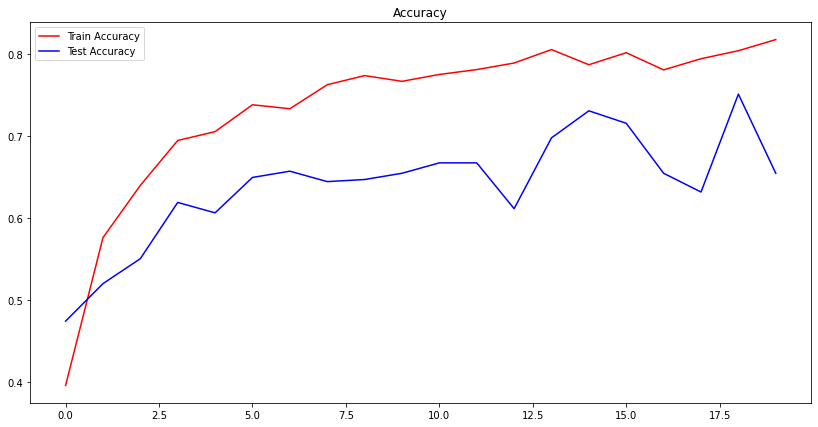

In [43]:
acc_4 = hist_4.history['accuracy']
val_acc_4 = hist_4.history['val_accuracy']

epochs = range(len(acc_4))
plt.figure(figsize = (14, 7))
plt.title('Accuracy')
plt.plot(epochs, acc_4, 'r', label = 'Train Accuracy')
plt.plot(epochs, val_acc_4, 'b', label = 'Test Accuracy')
plt.legend(loc = 'upper left')

plt.show()

In [44]:
Model_4.evaluate(test_set)

13/13 [==============================] - 6s 273ms/step - loss: 2.2303 - accuracy: 0.6548


[2.230311870574951, 0.6548223495483398]